In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

# Zadanie
Proszę pobrać dane z 

http://archive.ics.uci.edu/ml/datasets/Auto+MPG

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]



In [6]:
data = pd.read_csv(url, names=names, delimiter="\s+", na_values=["?"])
print(data.shape)

(398, 9)


In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Zadanie
Proszę usunąć kolumny, które nie są numeyczne.

In [8]:
drop_list = ['car name']

In [9]:
data=data.drop(drop_list, axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Zadanie
Prosze usunąć brakujące dane.

In [10]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [11]:
data=data.dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Zadanie
Proszę nauczyć wszytkie poznane modele regresji.
Który z nich działa najlepiej?

In [12]:
auto_target = data["acceleration"]
auto_data = data.drop(["acceleration"],axis=1)

In [13]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504.0,70,1
1,15.0,8,350.0,165.0,3693.0,70,1
2,18.0,8,318.0,150.0,3436.0,70,1
3,16.0,8,304.0,150.0,3433.0,70,1
4,17.0,8,302.0,140.0,3449.0,70,1


In [14]:
auto_target.head()

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [15]:
y=auto_target
X=auto_data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn import model_selection
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6],
                    'elasticnet__alpha': [0.3, 0.4, 1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

{'elasticnet__alpha': 0.3, 'polynomialfeatures__degree': 4}

In [19]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4}

In [20]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.1453e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.24963e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.17974e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.24291e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: Ill-conditioned matrix (rcond=1.1415e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\rid

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


{'polynomialfeatures__degree': 2, 'ridge__alpha': 3}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 2}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [22]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf'),
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                               "gamma": [ 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
grid_5.best_estimator_


{'C': 10000, 'gamma': 1e-06}


SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-06,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
from sklearn.ensemble import RandomForestRegressor

grid_6 = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features= 'sqrt', n_estimators=50, oob_score = True),
                   param_grid={
                   'n_estimators': [100, 150, 300, 400],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [ 400, 500, 600]
                   },
                    cv=kfold,
                    refit=True)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
grid_6.best_estimator_

{'max_depth': 600, 'max_features': 'auto', 'n_estimators': 300}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=600,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [24]:
from sklearn.neural_network import MLPRegressor
grid_7 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001, max_iter=5000),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(100,100,100,100,100,100,10)],
                                'alpha': [10, 100, 1000],
                               'activation': ['logistic', 'relu']                               
                               },#parametry do podstawienia
                    cv=kfold,#na ile czesci ma dzielic zbior
                    n_jobs=-1,
                    refit=True)
grid_7.fit(X, y)
print(grid_7.best_params_)
grid_7.best_estimator_

{'activation': 'logistic', 'alpha': 10, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 10)}


MLPRegressor(activation='logistic', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=5000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
from sklearn import  metrics

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RFR', grid_6.best_estimator_))
models.append(('MLP_R', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.6208719432414727
Explained variance score: 0.6229372246041841
Median absolute error: 1.0552754726793836
Mean squared error: 2.3929559386197403
Mean absolute errors: 1.1913684505308204
Lasso
R^2: 0.6218567149368096
Explained variance score: 0.6240481639979161
Median absolute error: 1.02091257772366
Mean squared error: 2.386740320348993
Mean absolute errors: 1.190184769434314
Ridge
R^2: 0.6523321822444226
Explained variance score: 0.6547812033908812
Median absolute error: 0.9591557412184812
Mean squared error: 2.194387237595183
Mean absolute errors: 1.138886679597383
LR
R^2: 0.508191788209341
Explained variance score: 0.5182871709718422
Median absolute error: 1.284872904419899
Mean squared error: 3.104163250613719
Mean absolute errors: 1.4309559493313864
SVR
R^2: 0.5621423460026705
Explained variance score: 0.5628775068674197
Median absolute error: 0.8513500830332674
Mean squared error: 2.763641610597975
Mean absolute errors: 1.2359515643256018
RFR
R^2: 0.61942880249019

In [26]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR','RFR','MLP_R'])
          #value=['ElasticNet','Lasso','Ridge','LR','SVR','RFR','MLP_R'])
df

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,ElasticNet,6.229372e-01,1.191368,2.392956,1.055275,0.620872
1,Lasso,6.240482e-01,1.190185,2.386740,1.020913,0.621857
2,Ridge,6.547812e-01,1.138887,2.194387,0.959156,0.652332
3,LR,5.182872e-01,1.430956,3.104163,1.284873,0.508192
4,SVR,5.628775e-01,1.235952,2.763642,0.851350,0.562142
5,RFR,6.205456e-01,1.206084,2.402065,0.985000,0.619429
6,MLP_R,1.110223e-16,1.793462,6.316759,1.340499,-0.000796


['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
[0, 1, 2, 3, 4, 5, 6]
[0.06384289 0.00843331 0.0675342  0.61155513 0.18789184 0.04348535
 0.01725727]


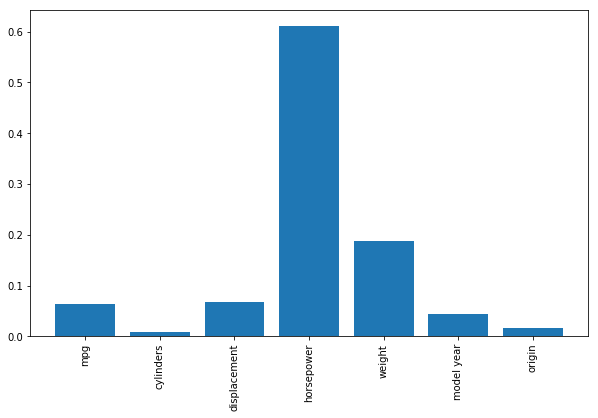

In [27]:
import matplotlib.pyplot as plt
# plot importance scores
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
print(names)
ticks = [i for i in range(len(names))]
print(ticks)
print(grid_6.best_estimator_.feature_importances_)
plt.figure(figsize=(10,6));
plt.bar(ticks, grid_6.best_estimator_.feature_importances_)
plt.xticks(ticks, names, rotation='vertical')
plt.show()

In [28]:
data.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object)